In [3]:
#Import the Libraries
import pandas as pd
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style("darkgrid")
%matplotlib inline

In [4]:
#Load the dataset
shop = pd.read_excel("Invoice_Data.xlsx")
shop.head()

,Bill. Doc.,Sold-To Pt,Billing Date,SOrg.,Material,Net Value,Curr.
0,90536365,100017850,2019-12-01,9500,85123A,15.30,EUR
1,90536365,100017850,2019-12-01,9500,71053,20.34,EUR
2,90536365,100017850,2019-12-01,9500,84406B,22.00,EUR
3,90536365,100017850,2019-12-01,9500,84029G,20.34,EUR
4,90536365,100017850,2019-12-01,9500,84029E,20.34,EUR


In [5]:
shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Bill. Doc.    397924 non-null  int64         
 1   Sold-To Pt    397924 non-null  int64         
 2   Billing Date  397924 non-null  datetime64[ns]
 3   SOrg.         397924 non-null  int64         
 4   Material      397924 non-null  object        
 5   Net Value     397924 non-null  float64       
 6   Curr.         397924 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 21.3+ MB


In [6]:
#Set column names
shop.columns = ["InvoiceNo","CustomerID","InvoiceDate","SalesOrg","Material","NetValue","Currency"]

In [7]:
shop.head()

,InvoiceNo,CustomerID,InvoiceDate,SalesOrg,Material,NetValue,Currency
0,90536365,100017850,2019-12-01,9500,85123A,15.30,EUR
1,90536365,100017850,2019-12-01,9500,71053,20.34,EUR
2,90536365,100017850,2019-12-01,9500,84406B,22.00,EUR
3,90536365,100017850,2019-12-01,9500,84029G,20.34,EUR
4,90536365,100017850,2019-12-01,9500,84029E,20.34,EUR


In [8]:
shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  int64         
 1   CustomerID   397924 non-null  int64         
 2   InvoiceDate  397924 non-null  datetime64[ns]
 3   SalesOrg     397924 non-null  int64         
 4   Material     397924 non-null  object        
 5   NetValue     397924 non-null  float64       
 6   Currency     397924 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 21.3+ MB


In [9]:
#Invoice date is already recognized  as datetime object, but run the below cell if its not detected as date time
# Convert InvoiceDate from object to datetime format
shop['InvoiceDate'] = pd.to_datetime(shop['InvoiceDate'])

In [10]:
shop.info()
#No Missing entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  int64         
 1   CustomerID   397924 non-null  int64         
 2   InvoiceDate  397924 non-null  datetime64[ns]
 3   SalesOrg     397924 non-null  int64         
 4   Material     397924 non-null  object        
 5   NetValue     397924 non-null  float64       
 6   Currency     397924 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 21.3+ MB


In [11]:
shop.head()

,InvoiceNo,CustomerID,InvoiceDate,SalesOrg,Material,NetValue,Currency
0,90536365,100017850,2019-12-01,9500,85123A,15.30,EUR
1,90536365,100017850,2019-12-01,9500,71053,20.34,EUR
2,90536365,100017850,2019-12-01,9500,84406B,22.00,EUR
3,90536365,100017850,2019-12-01,9500,84029G,20.34,EUR
4,90536365,100017850,2019-12-01,9500,84029E,20.34,EUR


In [12]:
shop["Currency"].unique()

array(['EUR'], dtype=object)

In [13]:
#shop.drop(["SalesOrg","Currency"],axis=1,inplace=True)

In [14]:
#Only One Currency in the dataset
#Removing the columns which are not required for our purpose
shop.drop(columns=["SalesOrg","Currency"],inplace=True)

In [15]:
shop.head()

,InvoiceNo,CustomerID,InvoiceDate,Material,NetValue
0,90536365,100017850,2019-12-01,85123A,15.30
1,90536365,100017850,2019-12-01,71053,20.34
2,90536365,100017850,2019-12-01,84406B,22.00
3,90536365,100017850,2019-12-01,84029G,20.34
4,90536365,100017850,2019-12-01,84029E,20.34


In [16]:
#Getting the Transaction Start & End dates

In [17]:
shop["InvoiceDate"].min()

Timestamp('2019-12-01 00:00:00')

In [18]:
shop["InvoiceDate"].max()

Timestamp('2020-12-09 00:00:00')

### RFM Analysis

In [19]:
shop.head()

,InvoiceNo,CustomerID,InvoiceDate,Material,NetValue
0,90536365,100017850,2019-12-01,85123A,15.30
1,90536365,100017850,2019-12-01,71053,20.34
2,90536365,100017850,2019-12-01,84406B,22.00
3,90536365,100017850,2019-12-01,84029G,20.34
4,90536365,100017850,2019-12-01,84029E,20.34


In [20]:
# Create snapshot date
snapshot_date = shop['InvoiceDate'].max() + timedelta(days=1)
print("Snapshot date considered is:",snapshot_date)

Snapshot date considered is: 2020-12-10 00:00:00


In [21]:
shop.groupby(['CustomerID']).agg({
        'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
        'InvoiceNo': 'nunique',
        'NetValue': 'sum'})

,InvoiceDate,InvoiceNo,NetValue
CustomerID,,,
100012346,327,1,77183.60
100012347,3,7,4310.00
100012348,76,4,1797.24
100012349,19,1,1757.55
100012350,312,1,334.40
...,...,...,...
100018280,278,1,180.60
100018281,181,1,80.82
100018282,8,2,178.05


In [22]:
# Create snapshot date
snapshot_date = shop['InvoiceDate'].max() + timedelta(days=1)
print("Snapshot date considered is:",snapshot_date)

# Grouping by CustomerID & Perform R F & M
data_process = shop.groupby(['CustomerID']).agg({
        'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
        'InvoiceNo': 'nunique',
        'NetValue': 'sum'})

# Rename the columns 
data_process.rename(columns={'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'NetValue': 'MonetaryValue'}, inplace=True)

Snapshot date considered is: 2020-12-10 00:00:00


In [23]:
data_process.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
100012346,327,1,77183.60
100012347,3,7,4310.00
100012348,76,4,1797.24
100012349,19,1,1757.55
100012350,312,1,334.40


In [24]:
data_process.shape

(4339, 3)

/var/folders/qj/rbyl_gdj7xn3ycgcxjpvn5080000gn/T/ipykernel_49227/1596305272.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_process['Recency'])
/var/folders/qj/rbyl_gdj7xn3ycgcxjpvn5080000gn/T/ipykernel_49227/1596305272.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_process['

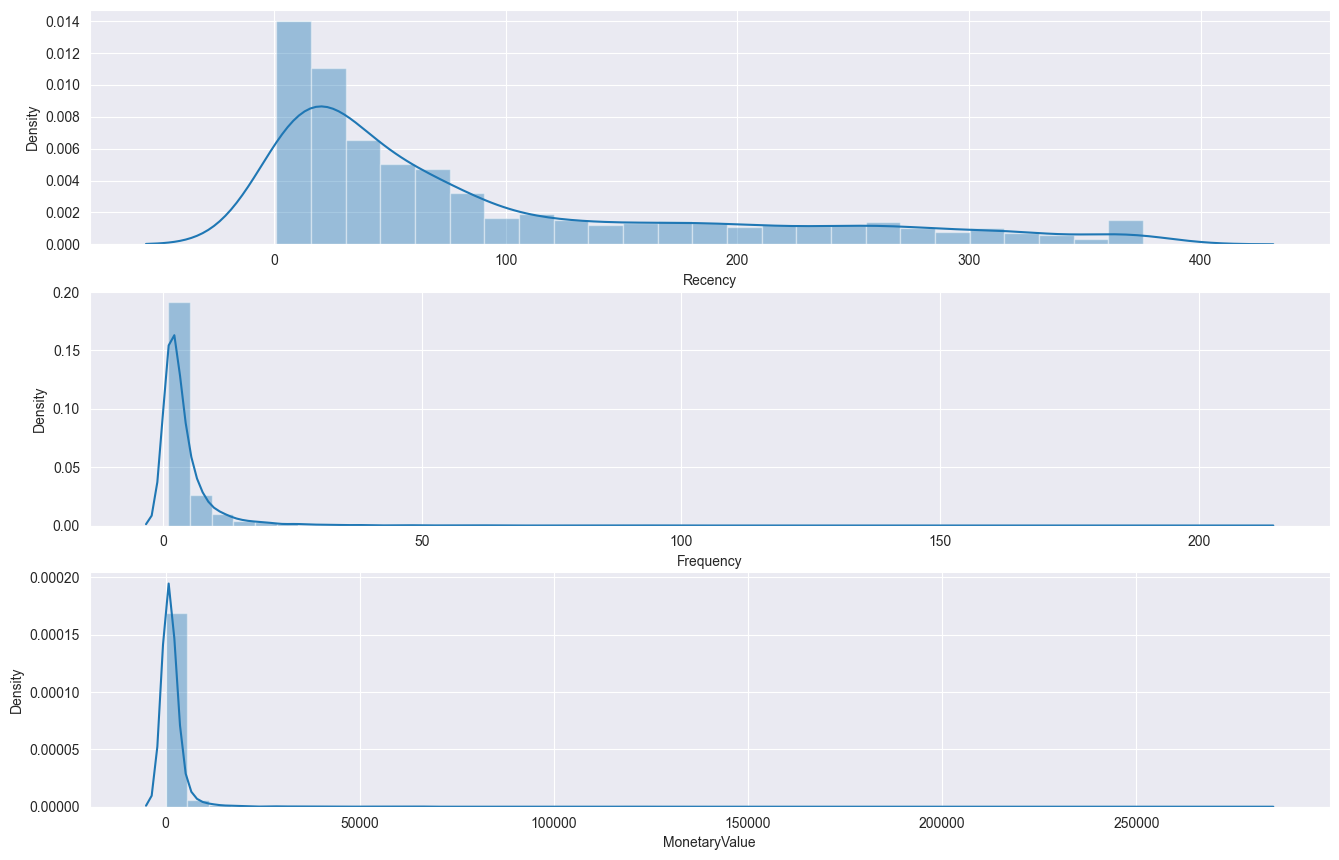

In [25]:
#Bring back the RFM distributions

# Plot RFM distributions
plt.figure(figsize=(16,14))

# Plot distribution of R
plt.subplot(4, 1, 1)
sns.distplot(data_process['Recency'])

# Plot distribution of F
plt.subplot(4, 1, 2)
sns.distplot(data_process['Frequency'])

# Plot distribution of M
plt.subplot(4, 1, 3)
sns.distplot(data_process['MonetaryValue'])

plt.show()

In [26]:
data_process

,Recency,Frequency,MonetaryValue
CustomerID,,,
100012346,327,1,77183.60
100012347,3,7,4310.00
100012348,76,4,1797.24
100012349,19,1,1757.55
100012350,312,1,334.40
...,...,...,...
100018280,278,1,180.60
100018281,181,1,80.82
100018282,8,2,178.05


In [27]:
data_process.describe()

,Recency,Frequency,MonetaryValue
count,4339.000000,4339.000000,4339.000000
mean,93.115695,4.271952,2053.793018
std,100.185303,7.705493,8988.248381
min,1.000000,1.000000,0.000000
25%,18.000000,1.000000,307.245000
50%,51.000000,2.000000,674.450000
75%,142.500000,5.000000,1661.640000
max,375.000000,210.000000,280206.020000


/var/folders/qj/rbyl_gdj7xn3ycgcxjpvn5080000gn/T/ipykernel_49227/71956835.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(recency_log)
/var/folders/qj/rbyl_gdj7xn3ycgcxjpvn5080000gn/T/ipykernel_49227/71956835.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(frequency_log)
/var/folders/q

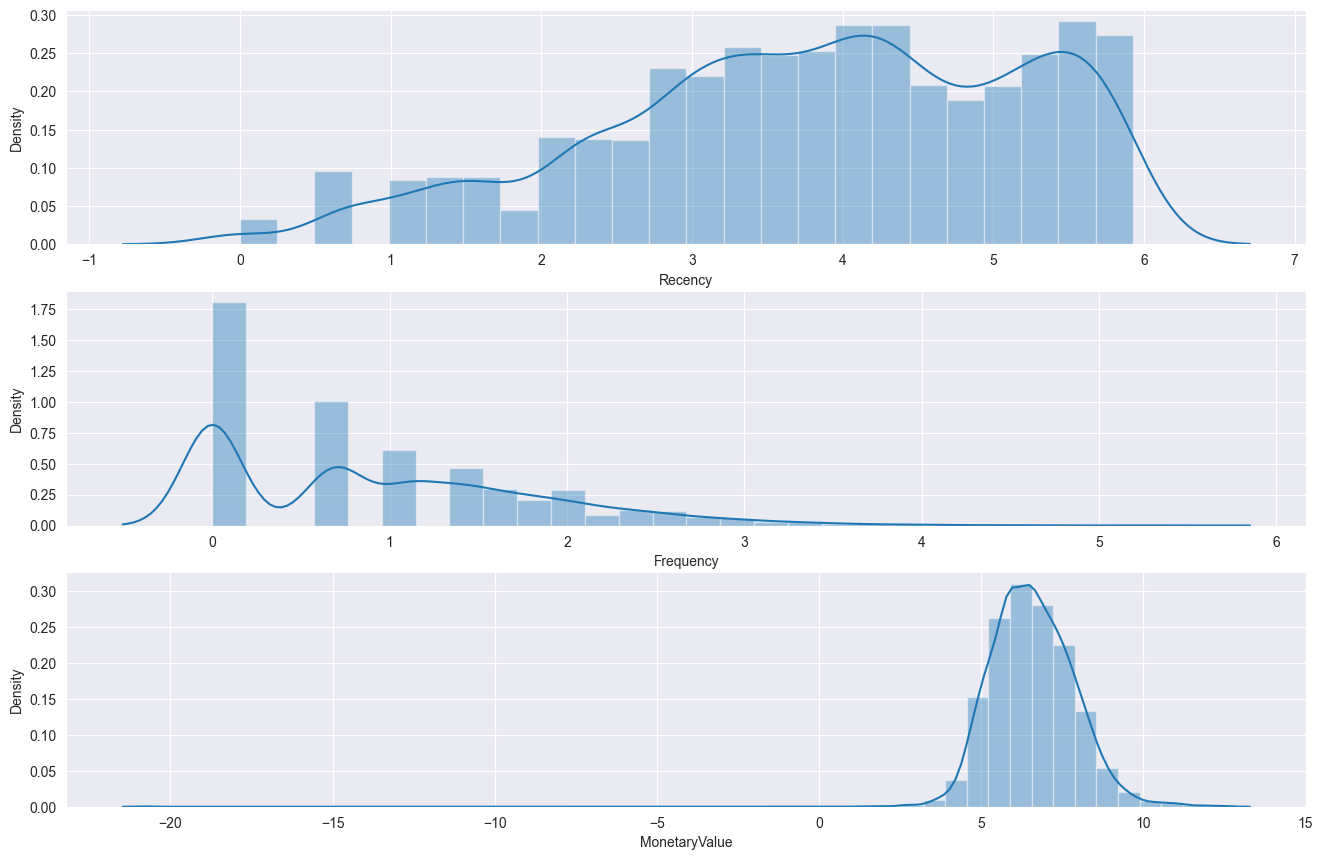

In [28]:
#To fix the skewness in the data - Apply transformation on the data
#Lets perform Log Transformation
data_process['MonetaryValue'] = data_process['MonetaryValue'] + 0.000000001 #for the zero values
recency_log = np.log(data_process['Recency'])
frequency_log = np.log(data_process['Frequency'])
monetary_log = np.log(data_process['MonetaryValue'])

# Plot RFM distributions
plt.figure(figsize=(16,14))

# Plot distribution of R
plt.subplot(4, 1, 1)
sns.distplot(recency_log)

# Plot distribution of F
plt.subplot(4, 1, 2)
sns.distplot(frequency_log)

# Plot distribution of M
plt.subplot(4, 1, 3)
sns.distplot(monetary_log)
plt.show()

In [29]:
data_process_log = pd.DataFrame({"Recency":recency_log,
                                "Frequency":frequency_log,
                                "Monetary Value":monetary_log,
                                })
data_process_log.head()

,Recency,Frequency,Monetary Value
CustomerID,,,
100012346,5.789960,0.000000,11.253942
100012347,1.098612,1.945910,8.368693
100012348,4.330733,1.386294,7.494007
100012349,2.944439,0.000000,7.471676
100012350,5.743003,0.000000,5.812338


In [30]:
data_process_log.describe()

,Recency,Frequency,Monetary Value
count,4339.000000,4339.000000,4339.000000
mean,3.801028,0.944320,6.584487
std,1.383885,0.900861,1.327190
min,0.000000,0.000000,-20.723266
25%,2.890372,0.000000,5.727645
50%,3.931826,0.693147,6.513898
75%,4.959336,1.609438,7.415560
max,5.926926,5.347108,12.543280


In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(data_process_log)
data_process_norm = scaler.transform(data_process_log)
data_process_norm_df = pd.DataFrame(data_process_norm)
data_process_norm_df.describe().round(2)

,0,1,2
count,4339.00,4339.00,4339.00
mean,0.00,-0.00,-0.00
std,1.00,1.00,1.00
min,-2.75,-1.05,-20.58
25%,-0.66,-1.05,-0.65
50%,0.09,-0.28,-0.05
75%,0.84,0.74,0.63
max,1.54,4.89,4.49


In [32]:
data_process_norm_df.columns = ['Recency','Frequency','MonetaryValue']
data_process_norm_df.head()

,Recency,Frequency,MonetaryValue
0,1.437375,-1.048362,3.518708
1,-1.953000,1.111943,1.344504
2,0.382811,0.490670,0.685377
3,-0.619046,-1.048362,0.668549
4,1.403440,-1.048362,-0.581860


/var/folders/qj/rbyl_gdj7xn3ycgcxjpvn5080000gn/T/ipykernel_49227/786757994.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(4, 1, 1); sns.distplot(data_process_norm_df['Recency'])
/var/folders/qj/rbyl_gdj7xn3ycgcxjpvn5080000gn/T/ipykernel_49227/786757994.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  

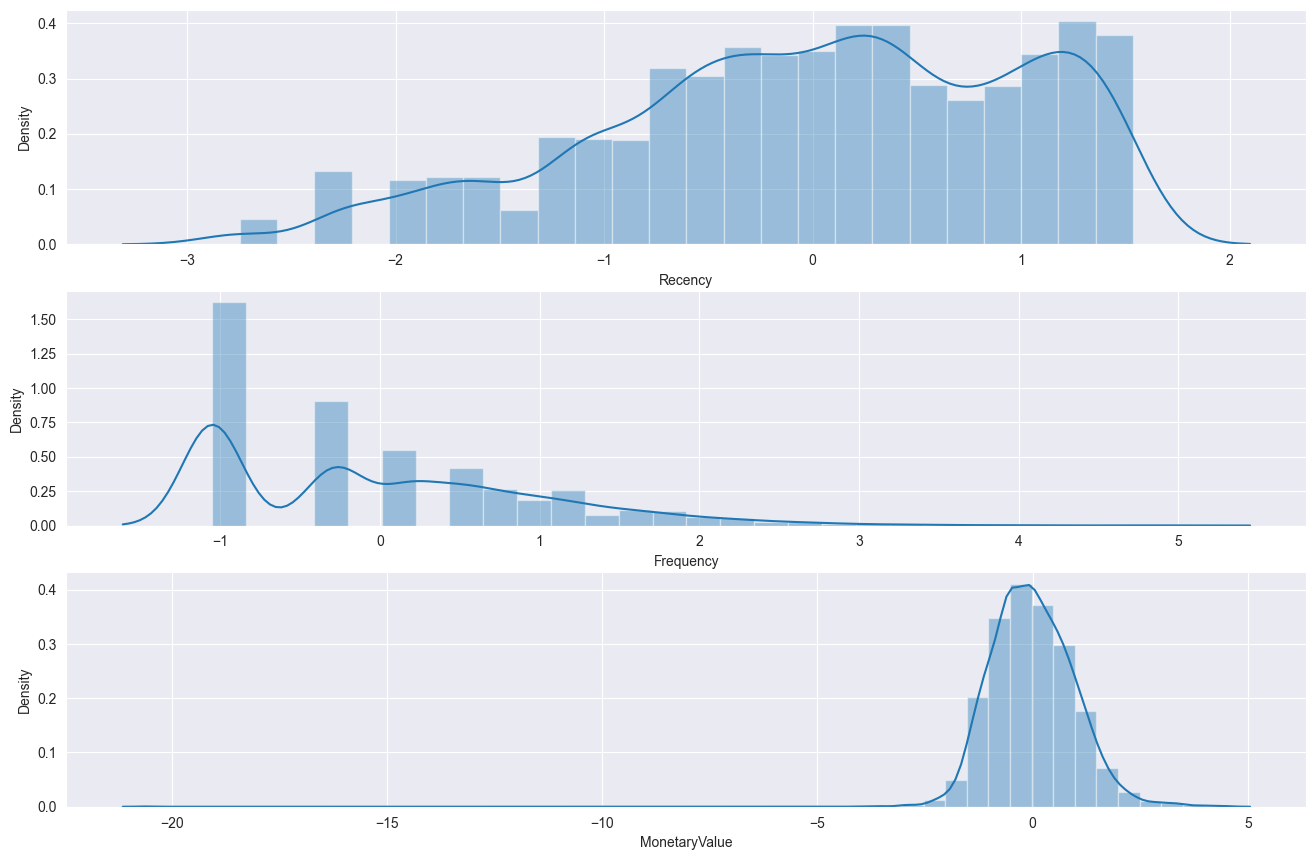

In [33]:
# Plot RFM distributions
plt.figure(figsize=(16,14))
# Plot distribution of R
plt.subplot(4, 1, 1); sns.distplot(data_process_norm_df['Recency'])
# Plot distribution of F
plt.subplot(4, 1, 2); sns.distplot(data_process_norm_df['Frequency'])
# Plot distribution of M
plt.subplot(4, 1, 3); sns.distplot(data_process_norm_df['MonetaryValue'])
plt.show()

### Optimal Number of Clusters

In [34]:
from sklearn.cluster import KMeans

In [35]:
data_process_norm_df.shape

(4339, 3)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

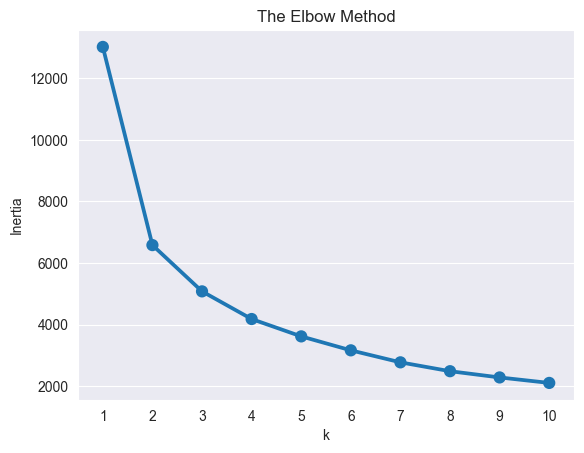

In [36]:
# Fit KMeans and calculate Inertia for each *k*
Inertia = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=6)
    kmeans.fit(data_process_norm_df)
    Inertia[k] = kmeans.inertia_
# Plot Inertia for each *k*
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('Inertia')

sns.pointplot(x=list(Inertia.keys()), y=list(Inertia.values()))
plt.show()

In [37]:
#Silhouette Method
from sklearn.metrics import silhouette_score

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

[0.430543834335269, 0.33797419161604964, 0.33572207326961834, 0.3082833788366914, 0.31197286342294583, 0.3131812564639997, 0.31197769099183403, 0.30523934542404263]


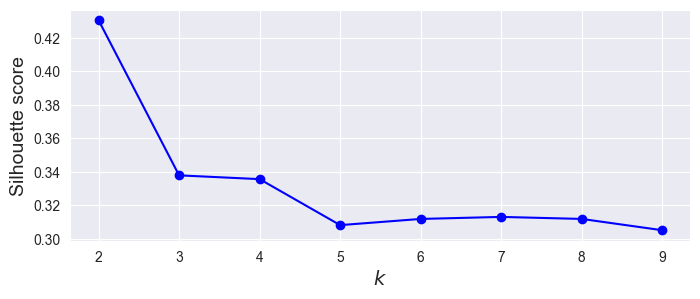

In [38]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(data_process_norm_df)
                for k in range(1, 10)]
silhouette_scores = [silhouette_score(data_process_norm_df, model.labels_)
                     for model in kmeans_per_k[1:]]
print(silhouette_scores)
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

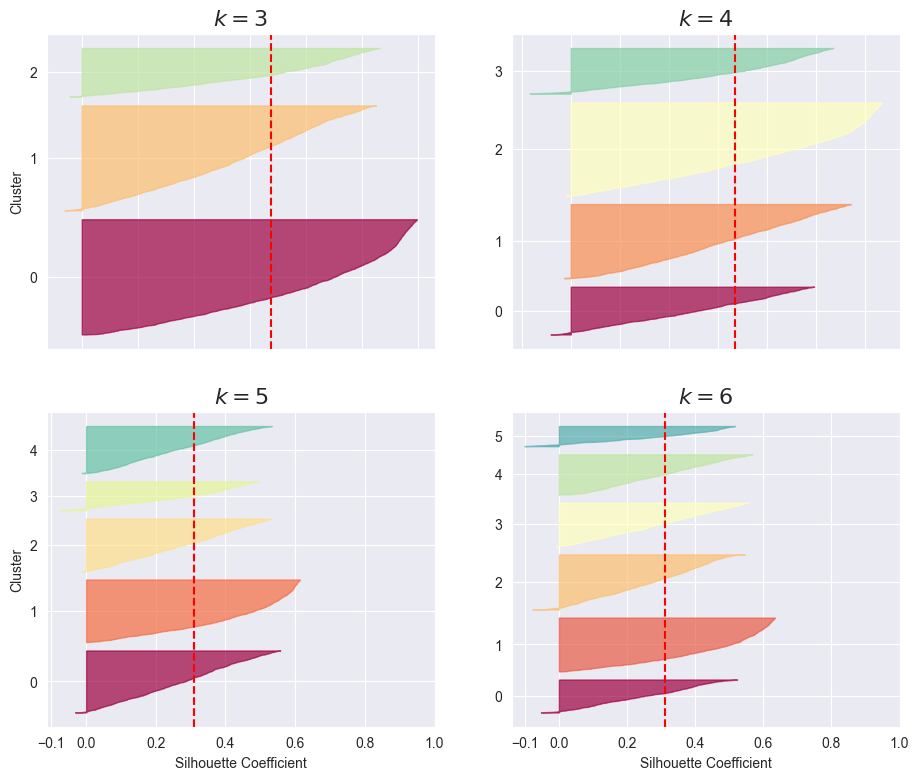

In [39]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(data_process_norm_df, y_pred)

    padding = len(data_process_norm_df) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

In [40]:
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(data_process_norm_df)
# Assign k-means labels to cluster labels
cluster_labels = kmeans.labels_
# Assign cluster labels to original pre-transformed data set
data_process_k4 = data_process.assign(Cluster = cluster_labels)
# Group data set by k-means cluster
data_process_k4.groupby(['Cluster']).agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': 'mean',
    "Cluster":"count",
}).round(0)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Recency,Frequency,MonetaryValue,Cluster
Cluster,,,,
0,73.0,4.0,1756.0,1229
1,190.0,1.0,347.0,1512
2,22.0,2.0,491.0,835
3,11.0,13.0,7626.0,763


In [41]:
data_process_k4

,Recency,Frequency,MonetaryValue,Cluster
CustomerID,,,,
100012346,327,1,77183.60,0
100012347,3,7,4310.00,3
100012348,76,4,1797.24,0
100012349,19,1,1757.55,2
100012350,312,1,334.40,1
...,...,...,...,...
100018280,278,1,180.60,1
100018281,181,1,80.82,1
100018282,8,2,178.05,2


In [42]:
data_process_k4["Cluster"].value_counts()

Cluster
1    1512
0    1229
2     835
3     763
Name: count, dtype: int64

In [43]:
data_process_norm_df

,Recency,Frequency,MonetaryValue
0,1.437375,-1.048362,3.518708
1,-1.953000,1.111943,1.344504
2,0.382811,0.490670,0.685377
3,-0.619046,-1.048362,0.668549
4,1.403440,-1.048362,-0.581860
...,...,...,...
4334,1.320055,-1.048362,-1.046092
4335,1.009933,-1.048362,-1.651999
4336,-1.244168,-0.278846,-1.056808
4337,-1.745096,2.029702,0.800855


In [44]:
# Import libraries
from mpl_toolkits import mplot3d
%matplotlib notebook

In [45]:
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

# Creating plot
ax.scatter3D(data_process_norm_df[(data_process_k4["Cluster"] == 0).values]["Recency"], 
             data_process_norm_df[(data_process_k4["Cluster"] == 0).values]["Frequency"], 
             data_process_norm_df[(data_process_k4["Cluster"] == 0).values]["MonetaryValue"], 
             c = "red",label = "Cluster 0",alpha=0.3)

ax.scatter3D(data_process_norm_df[(data_process_k4["Cluster"] == 1).values]["Recency"], 
             data_process_norm_df[(data_process_k4["Cluster"] == 1).values]["Frequency"],
             data_process_norm_df[(data_process_k4["Cluster"] == 1).values]["MonetaryValue"], 
             c = "blue",label = "Cluster 1",alpha=0.3)

ax.scatter3D(data_process_norm_df[(data_process_k4["Cluster"] == 2).values]["Recency"],
             data_process_norm_df[(data_process_k4["Cluster"] == 2).values]["Frequency"], 
             data_process_norm_df[(data_process_k4["Cluster"] == 2).values]["MonetaryValue"], 
             c = "black",label = "Cluster 2",alpha=0.3)

ax.scatter3D(data_process_norm_df[(data_process_k4["Cluster"] == 3).values]["Recency"],
             data_process_norm_df[(data_process_k4["Cluster"] == 3).values]["Frequency"], 
             data_process_norm_df[(data_process_k4["Cluster"] == 3).values]["MonetaryValue"], 
             c = "yellow",label = "Cluster 3",alpha=0.3)

ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetary Value")
plt.title("Scatter Plot of Clusters")
plt.legend()
# show plot
plt.show()


<IPython.core.display.Javascript object>